<a href="https://colab.research.google.com/github/MartinVIllesca/Ramos-Redes/blob/master/taller%20de%20proyecto/stanford-dogs-keras-vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#-------Import Dependencies-------#
%matplotlib inline
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

from scipy import misc,ndimage
from scipy.ndimage.interpolation import zoom
# from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

Using TensorFlow backend.


In [0]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [0]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
chihuahua_dir = '/content/drive/My Drive/data_EL5003/Images/n02085620-Chihuahua'
japanese_spaniel_dir = '/content/drive/My Drive/data_EL5003/Images/n02085782-Japanese_spaniel'
maltese_dir = '/content/drive/My Drive/data_EL5003/Images/n02085936-Maltese_dog'
pekinese_dir = '/content/drive/My Drive/data_EL5003/Images/n02086079-Pekinese'
shitzu_dir = '/content/drive/My Drive/data_EL5003/Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = '/content/drive/My Drive/data_EL5003/Images/n02086646-Blenheim_spaniel'
papillon_dir = '/content/drive/My Drive/data_EL5003/Images/n02086910-papillon'
toy_terrier_dir = '/content/drive/My Drive/data_EL5003/Images/n02087046-toy_terrier'
# afghan_hound_dir = '/content/drive/My Drive/data_EL5003/Images/n02088094-Afghan_hound'
# basset_dir = '/content/drive/My Drive/data_EL5003/Images/n02088238-basset'


X = []
Z = []
imgsize = 150

In [9]:
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
# training_data('afghan_hound',afghan_hound_dir)
# training_data('basset',basset_dir)

100%|██████████| 172/172 [00:53<00:00,  3.24it/s]


In [0]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [0]:
augs_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.2,  
        height_shift_range=0.2, 
        horizontal_flip=True,  
        vertical_flip=False) 

augs_gen.fit(x_train)

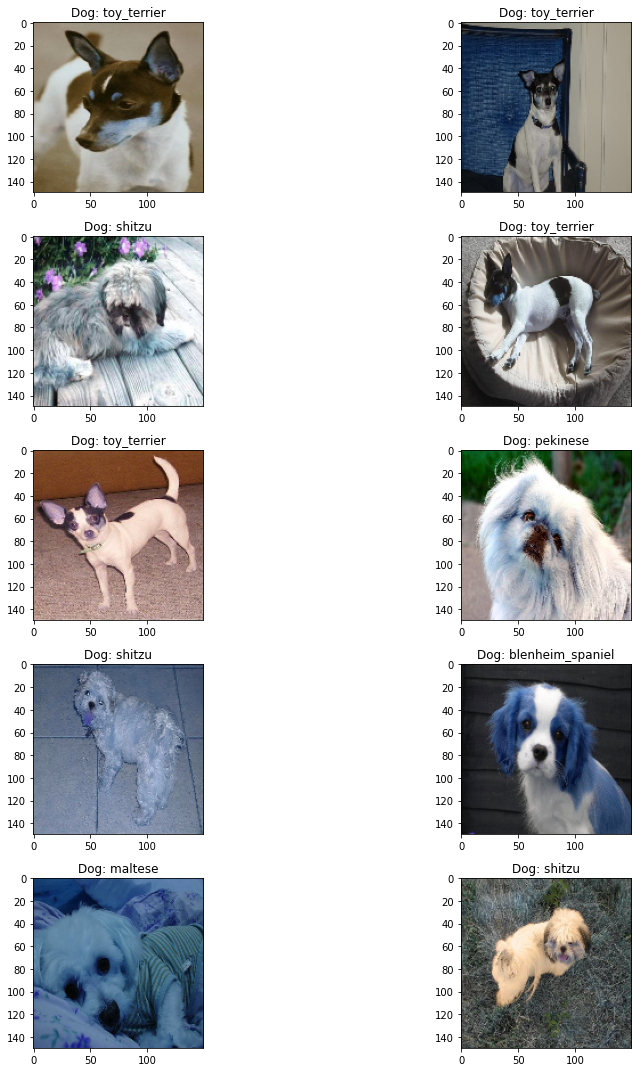

In [12]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

<keras.engine.input_layer.InputLayer object at 0x7f7e59314630> False
<keras.layers.convolutional.Conv2D object at 0x7f7e593145c0> False
<keras.layers.convolutional.Conv2D object at 0x7f7e59314198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e59314208> False
<keras.layers.convolutional.Conv2D object at 0x7f7e61356a20> False
<keras.layers.convolutional.Conv2D object at 0x7f7e5930f320> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e5930d748> False
<keras.layers.convolutional.Conv2D object at 0x7f7e5930d908> False
<keras.layers.convolutional.Conv2D object at 0x7f7e59309c18> False
<keras.layers.convolutional.Conv2D object at 0x7f7e59309048> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e59305550> False
<keras.layers.convolutional.Conv2D object at 0x7f7e59305780> False
<keras.layers.convolutional.Conv2D object at 0x7f7e592e4a20> False
<keras.layers.convolutional.Conv2D object at 0x7f7e592e4208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f7e592df320>

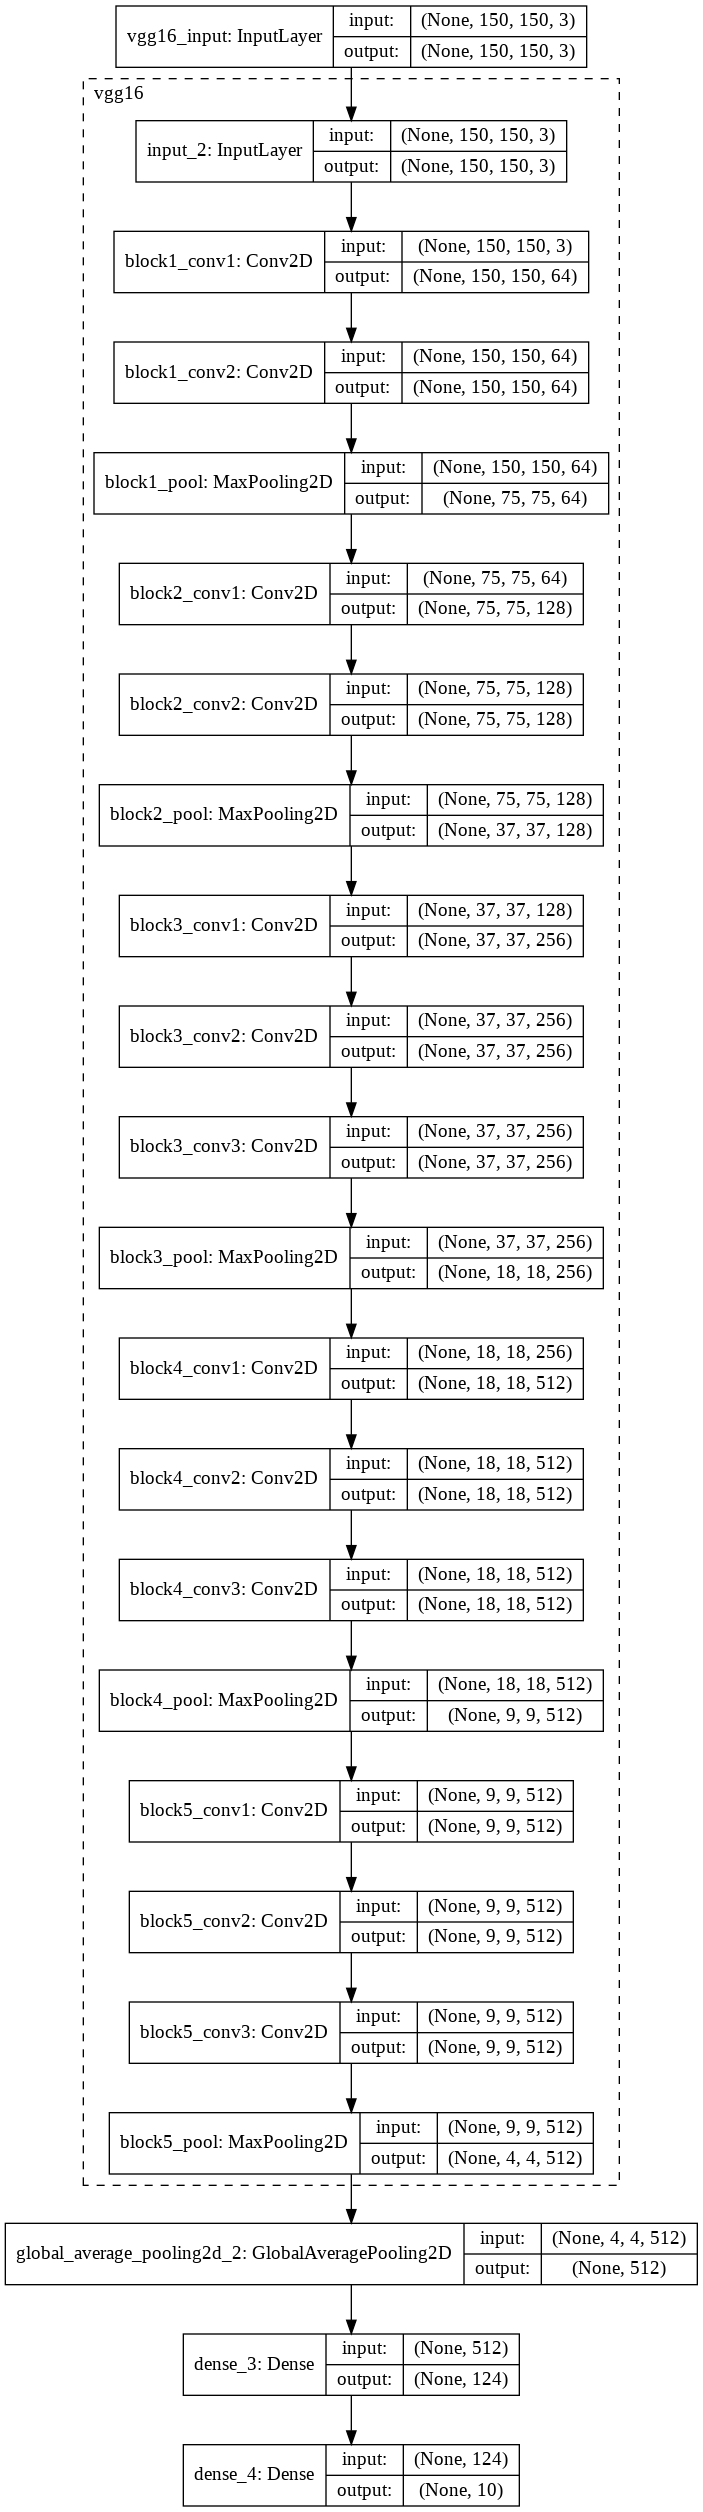

In [14]:
base_model = VGG16(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
model.add(Dense(124,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [15]:
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto'
)
tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint,tensorboard,csvlogger,reduce]

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '
/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:97: UserWarning: The TensorBoard callback does not support gradients display when using TensorFlow 2.0. The `write_grads` argument is ignored.
  warnings.warn('The TensorBoard callback does not support '


In [18]:
#-----------Optimizers-----------#
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
#----------Compile---------------#
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
#-----------Training------------#
history = model.fit_generator(
    augs_gen.flow(x_train,y_train,batch_size=16),
    validation_data  = (x_test,y_test),
    validation_steps = 20,
    steps_per_epoch  = 20,
    epochs = 20, 
    verbose = 1,
    callbacks=callbacks
)

Epoch 1/20
20/20 [==============================] - 169s 8s/step - loss: 1.7495 - accuracy: 0.3688 - val_loss: 1.6614 - val_accuracy: 0.4592

Epoch 00001: val_loss improved from 1.87181 to 1.66136, saving model to ./base.model
Epoch 2/20
20/20 [==============================] - 168s 8s/step - loss: 1.6206 - accuracy: 0.4656 - val_loss: 1.5535 - val_accuracy: 0.4547

Epoch 00002: val_loss improved from 1.66136 to 1.55347, saving model to ./base.model
Epoch 3/20
20/20 [==============================] - 168s 8s/step - loss: 1.4992 - accuracy: 0.5250 - val_loss: 1.4796 - val_accuracy: 0.4547

Epoch 00003: val_loss improved from 1.55347 to 1.47957, saving model to ./base.model
Epoch 4/20
20/20 [==============================] - 170s 9s/step - loss: 1.4590 - accuracy: 0.5329 - val_loss: 1.4342 - val_accuracy: 0.4790

Epoch 00004: val_loss improved from 1.47957 to 1.43423, saving model to ./base.model
Epoch 5/20
20/20 [==============================] - 167s 8s/step - loss: 1.4131 - accuracy: 

In [21]:
# show_final_history(history)
model.load_weights('./base.model')
model_score = model.evaluate(x_test,y_test)
print("Model Test Loss:",model_score[0])
print("Model Test Accuracy:",model_score[1])

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
    
model.save("model.h5")
print("Weights Saved")

453/453 [==============================] - 97s 215ms/step
Model Test Loss: 1.0554708941093345
Model Test Accuracy: 0.6158940196037292
Weights Saved


In [20]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
LOG_DIR = './logs' # Here you have to put your log directory
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 8080 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 8080 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-05-07 22:03:08--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.171.144.182, 52.86.137.228, 34.231.129.73, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.171.144.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  78.5MB/s    in 0.2s    

2020-05-07 22:03:08 (78.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
https://a1b50234.ngrok.io
